# Canny 边缘检测
## 目标
OpenCV 中的 Canny 边缘检测
- 了解 Canny 边缘检测的概念
- 学习函数 cv2.Canny()
## 15.1 原理
Canny 边缘检测是一种非常流行的边缘检测算法，是 John F.Canny 在
1986 年提出的。它是一个有很多步构成的算法，我们接下来会逐步介绍。
### 15.1.1 噪声去除(Noise Reduction)
由于边缘检测很容易受到噪声影响，所以第一步是使用 5x5 的高斯滤波器去除噪声，这个前面我们已经学过了。![](Gaussian_noise_re.png)
### 15.1.2 计算图像梯度
对平滑后的图像使用 Sobel 算子计算水平方向和竖直方向的一阶导数（图像梯度）（ Gx 和 Gy）。根据得到的这两幅梯度图（ Gx 和 Gy）找到边界的梯度和方向，公式如下：
$$
Edge−Gradient (G) = \sqrt{G^2_ x + G^2_y}
$$
$$
Angle(θ) = tan^{-1} (\frac{G_x}{G_y} )
$$  
梯度的方向一般总是与边界垂直。梯度方向被归为四类：垂直，水平，和两个对角线。
### 15.1.3 非极大值抑制
在获得梯度的方向和大小之后，应该对整幅图像做一个扫描，去除那些非边界上的点。对每一个像素进行检查，看这个点的梯度是不是周围具有相同梯度方向的点中最大的。如下图所示：
![](edge.png)
如图，边缘edge在点A垂直方向的位置  
梯度方向Gradient Direction垂直于边缘，点B和点C是梯度方向，因此，点A与点B和点C进行比较，看它是否形成局部最大值，如果是，则考虑到下一个阶段，否则，它将被抑制（变为0），简而言之，现在你得到的是一个包含“窄边界”的二值图像。

### 15.1.4 滞后阈值（双阈值处理Hysteresis Thresholding）
现在要确定那些边界才是真正的边界。这时我们需要设置两个阈值：
minVal 和 maxVal。当图像的灰度梯度高于 maxVal 时被认为是真的边界，
那些低于 minVal 的边界会被抛弃。如果介于两者之间的话，就要看这个点是
否与某个被确定为真正的边界点相连，如果是就认为它也是边界点，如果不是
就抛弃。如下图：![](double_thresh.png)

## 15.2 OpenCV 中的 Canny 边界检测
在 OpenCV 中只需要一个函数： cv2.Canny(src,threshold1,threshold2[,edges[,apertureSize[,L2gradient]]])，就可以完成以上几步。
让我们看如何使用这个函数。
- 这个函数的第一个参数是输入图像。
- 第二和第三个分别是 minVal 和 maxVal。
- 第三个参数设置用来计算图像梯度的 Sobel卷积核的大小，默认值为 3。
- 最后一个参数是 L2gradient，它可以用来设定求梯度大小的方程。如果设为 True，就会使用我们上面提到过的方程，否则使用方程：$$ Edge−Gradient (G) = \mid G^2_x \mid + \mid G^2_y \mid$$代替，默认值为 False。

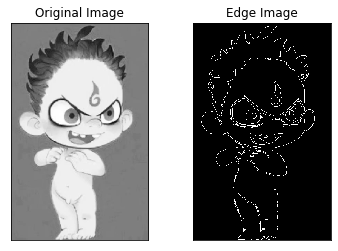

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('canny_test.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 参考资料：
《OpenCV轻松入门：面向python》
《OpenCV-Python-Tutorial-中文版》